In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
ap=pd.read_csv('Bourse/AAPL.csv',index_col='Date')
cisco=pd.read_csv('Bourse/CSCO.csv',index_col='Date')
mcsft=pd.read_csv('Bourse/MSFT.csv',index_col='Date')
qualc=pd.read_csv('Bourse/QCOM.csv',index_col='Date')
strbk=pd.read_csv('Bourse/SBUX.csv',index_col='Date')
tesla=pd.read_csv('Tesla5y.csv',index_col='Date')

In [40]:
L=['ap','cisco','mcsft','qualc','strbk','tesla']

dico = {}

dico["ap"]=pd.read_csv('Bourse/AAPL.csv',index_col='Date').reindex(index=ap.index[::-1])
dico["cisco"]=pd.read_csv('Bourse/CSCO.csv',index_col='Date').reindex(index=cisco.index[::-1])
dico["mcsft"]=pd.read_csv('Bourse/MSFT.csv',index_col='Date').reindex(index=mcsft.index[::-1])
dico["qualc"]=pd.read_csv('Bourse/QCOM.csv',index_col='Date').reindex(index=qualc.index[::-1])
dico["strbk"]=pd.read_csv('Bourse/SBUX.csv',index_col='Date').reindex(index=strbk.index[::-1])
dico["tesla"]=pd.read_csv('Tesla5y.csv',index_col='Date').reindex(index=tesla.index[::-1])


In [41]:
for comp in L:
    dico[comp]['Open']=dico[comp]['Open'].str.replace('$','').astype(float)
    dico[comp]['High']=dico[comp]['High'].str.replace('$','').astype(float)
    dico[comp]['Low']=dico[comp]['Low'].str.replace('$','').astype(float)
    dico[comp]['Close/Last']=dico[comp]['Close/Last'].str.replace('$','').astype(float)

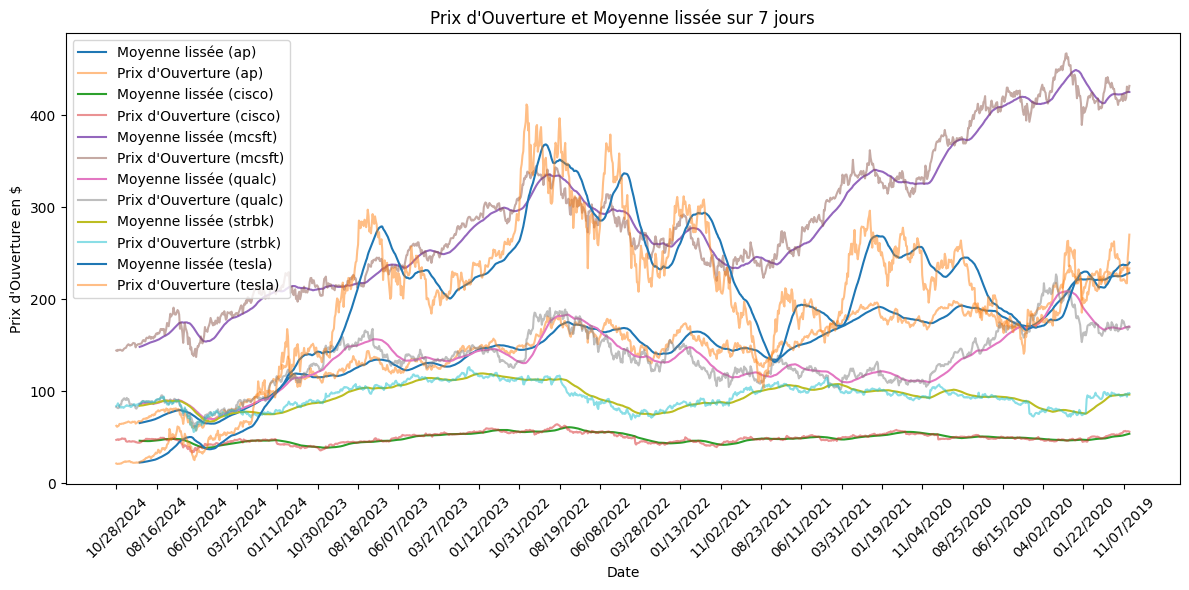

In [42]:
for comp in L:
    dico[comp]['Moyenne lissée'] = dico[comp]['Open'].rolling(window=30).mean()



plt.figure(figsize=(12, 6))
for comp in L:
    plt.plot(dico[comp]['''Moyenne lissée'''], label="Moyenne lissée (" + comp + ')' )
    plt.plot(dico[comp]['Open'], label="Prix d'Ouverture ("+ comp + ')' , alpha=0.5)


abs = range(0, len(ap), 50)
plt.xticks(abs, ap.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix d\'Ouverture en $')
plt.title('Prix d\'Ouverture et Moyenne lissée sur 7 jours')
plt.legend()
plt.tight_layout()
plt.show()